In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
%matplotlib notebook
import networkx as nx

# Try Reinforcement Learning on Djikstra's Algorithm

In [2]:
class myNode:
    def __init__(self,nodeid):
        self.adj_list=[]
        self.edj_list=[]
        self.nodeid=nodeid
    def __str__(self):
        return (str(self.nodeid)+':'+str(self.adj_list)+str(self.edj_list))
            

In [3]:
num_nodes=10
print(int(random.random()*num_nodes))

9


In [4]:
np.random.rand(5)*10

array([1.05866136, 7.46857244, 0.93821767, 9.09106989, 2.68033023])

# Construct Random Graph

In [30]:
mynodes=[]
num_nodes=10
for i in range(num_nodes):
    nodeid=i
    mynodes.append(myNode(nodeid))
    adj_list = random.sample(range(num_nodes), int(random.random()*num_nodes/2))
    if nodeid in adj_list:
        adj_list.remove(nodeid)
    edj_list = [int(1+np.random.rand()*num_nodes/2) for i in range(len(adj_list))]
    mynodes[-1].adj_list = adj_list
    mynodes[-1].edj_list = edj_list

In [37]:
for node in mynodes:
    print(node)

0:[1, 2, 7, 9][1, 3, 3, 20]
1:[5][3]
2:[0, 7, 1][2, 3, 2]
3:[][]
4:[6, 1, 2][5, 4, 4]
5:[9][5]
6:[1, 7][2, 5]
7:[4, 2, 1][4, 3, 1]
8:[9, 4][2, 3]
9:[5, 8, 2, 1][2, 3, 2, 3]


In [36]:
mynodes[0].edj_list.append(20)

# Single Source Shortest Path - Dijkstra's Algorithm

In [74]:
def sssp(start_node, end_node):
    global mynodes
    costs = np.ones(len(mynodes))*1000000
    costs[start_node.nodeid]=0
    visited = np.zeros(len(mynodes),dtype=bool)
    currnode=start_node
    nodeslist = [currnode]
    idx=0
    while (len(nodeslist)>0):
        idx+=1
        currnode=nodeslist.pop()
        print('popped ', currnode)
        for node,edj in zip(currnode.adj_list, currnode.edj_list):
            prevcost = costs[mynodes[node].nodeid]
            costs[mynodes[node].nodeid] = min(prevcost, edj+costs[currnode.nodeid])
            if (costs[mynodes[node].nodeid]<prevcost) or (visited[mynodes[node].nodeid]==False):
                nodeslist.append(mynodes[node])
                visited[mynodes[node].nodeid]=True
                print([node.nodeid for node in nodeslist], idx)
        #if idx>20: break
    return costs
        
        

In [75]:
sssp(mynodes[0],mynodes[9])

popped  0:[1, 2, 7, 9][1, 3, 3, 20]
[1] 1
[1, 2] 1
[1, 2, 7] 1
[1, 2, 7, 9] 1
popped  9:[5, 8, 2, 1][2, 3, 2, 3]
[1, 2, 7, 5] 2
[1, 2, 7, 5, 8] 2
popped  8:[9, 4][2, 3]
[1, 2, 7, 5, 4] 3
popped  4:[6, 1, 2][5, 4, 4]
[1, 2, 7, 5, 6] 4
popped  6:[1, 7][2, 5]
popped  5:[9][5]
popped  7:[4, 2, 1][4, 3, 1]
[1, 2, 4] 7
popped  4:[6, 1, 2][5, 4, 4]
[1, 2, 6] 8
popped  6:[1, 7][2, 5]
popped  2:[0, 7, 1][2, 3, 2]
[1, 0] 10
popped  0:[1, 2, 7, 9][1, 3, 3, 20]
popped  1:[5][3]
[5] 12
popped  5:[9][5]
[9] 13
popped  9:[5, 8, 2, 1][2, 3, 2, 3]
[8] 14
popped  8:[9, 4][2, 3]


array([0.0e+00, 1.0e+00, 3.0e+00, 1.0e+06, 7.0e+00, 4.0e+00, 1.2e+01,
       3.0e+00, 1.2e+01, 9.0e+00])

# Graph Viz..

In [39]:
plt.cm.spectral

In [40]:
embedding = np.array([embedding_with_nodes[i] for i in range(num_nodes)]).T

NameError: name 'embedding_with_nodes' is not defined

In [ ]:
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

In [44]:
def visualize(G=None):
    ################ Construct the adjacency matrix and graph
    A = np.zeros((len(mynodes), len(mynodes)))
    for node in mynodes:
        for node_adj,node_edj in zip(node.adj_list, node.edj_list):
            A[mynodes[node.nodeid].nodeid, mynodes[node_adj].nodeid] = node_edj
    G = nx.from_numpy_matrix(A)
    ######################3
    plt.figure(1, facecolor='w', figsize=(10, 8))
    plt.clf()
    ax = plt.axes([0., 0., 1., 1.])
    plt.axis('off')

    embedding_with_nodes = nx.spring_layout(G)
    embedding = np.array([embedding_with_nodes[i] for i in range(num_nodes)]).T
    node_labels = np.array([mynodes[i].nodeid for i in range(num_nodes)])
    plt.scatter(embedding[0], embedding[1], s=1000, c='r', cmap=plt.cm.spectral)
    
    for node_label,idx in zip(node_labels, range(num_nodes)):
        plt.text(embedding[0,idx], embedding[1,idx], node_label, fontsize=16)
    # Plot the edges
    start_idx, end_idx = 0, num_nodes #np.where(non_zero)

    segments=[]
    values = []
    edj_colors=[]
    edj_labels=[]
    w = 0.01
    for node in mynodes:
        for node_adj,node_edj in zip(node.adj_list, node.edj_list):
            #A[mynodes[node.nodeid].nodeid, mynodes[node_adj].nodeid] = node_edj
            pos1 = embedding[:,node.nodeid]
            pos2 = embedding[:,mynodes[node_adj].nodeid]
            pos = (pos1+pos2)/2
            
            values.append(node_edj)
            if node.nodeid>mynodes[node_adj].nodeid:
                segments.append([embedding[:,node.nodeid]-w/2, embedding[:,mynodes[node_adj].nodeid]-w/2])
                edj_labels.append((pos[0]-w,pos[1]-w, node_edj))
                edj_colors.append('r')
            else:
                edj_labels.append((pos[0]+w,pos[1]+w, node_edj))
                segments.append([embedding[:,node.nodeid]+w/2, embedding[:,mynodes[node_adj].nodeid]+w/2])
                edj_colors.append('k')
    values=np.array(values)/10
    lc = LineCollection(segments, zorder=0, color=edj_colors, cmap=plt.cm.hot_r,\
                        norm=plt.Normalize(0, .7 * values.max()))
    #lc.set_array(values)
    lc.set_linewidths(5 * values)
    ax.add_collection(lc)
    for edj_label in edj_labels:
        plt.text(edj_label[0], edj_label[1], edj_label[2], fontsize=12)
    

In [69]:
for node in mynodes:
    print(node)

0:[1, 2, 7, 9][1, 3, 3, 20]
1:[5][3]
2:[0, 7, 1][2, 3, 2]
3:[1][1]
4:[6, 1, 2][5, 4, 4]
5:[9][5]
6:[1, 7][2, 5]
7:[4, 2, 1][4, 3, 1]
8:[9, 4][2, 3]
9:[5, 8, 2, 1][2, 3, 2, 3]


In [47]:
mynodes[3].edj_list.append(1)

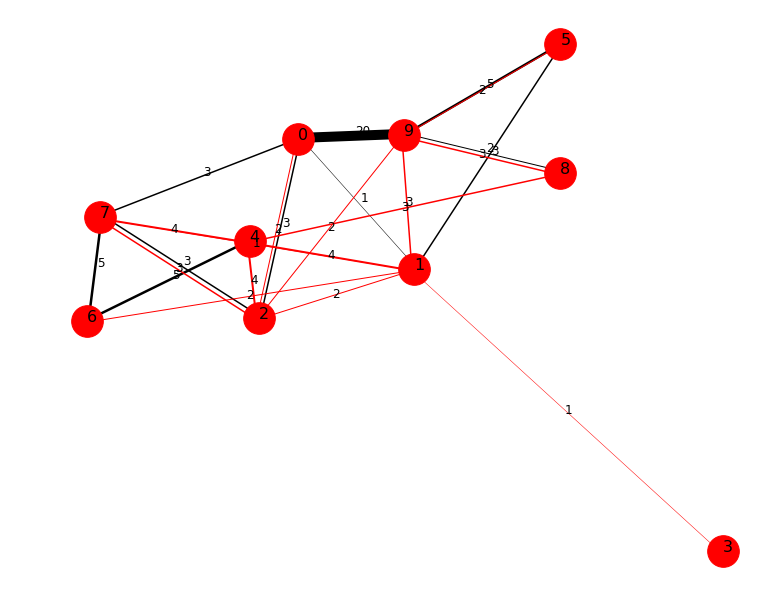

In [68]:
visualize()

In [202]:
# Helper functions...
def printtype(elem):
    if (type(elem)==np.datetime64):
        print('\''+str(pd.to_datetime(elem).date())+'\'',end=" ")
    elif (type(elem) in [np.float, np.float64]):
        print("{0:.4f} ".format(elem), end="")
    else:
        print(elem, end=" ")
def printval(*args, end=''):
    for arg in args:
        if (type(arg) in [np.ndarray, list, np.array]):
            print('[', end='')
            for x in arg:
                printval(x, end=',')
            print(']',end=end)
        else:
            printtype(arg)
    print(" ", end=end)

# Conventional Updates on Q table...

In [76]:
class graphenv:
    def __init__(self, nodes_list):
        self.state=None
        self.mynodes = nodes_list
        self.costs = np.ones(len(mynodes))*1000000
    def reset(self,initial_nodeid=0):
        self.state=mynodes[initial_nodeid]
    # action is a step along one of the edges in the edge list
    def step(self, action):
        if (action>len(self.state.adj_list)):
            return -1
        new_nodeid =self.state.adj_list[action]
        edge_cost = self.state.edj_list[action]
        self.state=self.mynodes[new_nodeid]
        #cost = edge_cost
        reward = edge_cost
        return new_nodeid, reward
        

In [77]:
actions = np.array([1, 2, 3, 1, 4, 1])

In [78]:
for node in mynodes:
    print(node)

0:[1, 2, 7, 9][1, 3, 3, 20]
1:[5][3]
2:[0, 7, 1][2, 3, 2]
3:[1][1]
4:[6, 1, 2][5, 4, 4]
5:[9][5]
6:[1, 7][2, 5]
7:[4, 2, 1][4, 3, 1]
8:[9, 4][2, 3]
9:[5, 8, 2, 1][2, 3, 2, 3]


In [208]:
#########Exploration vs Exploitation
lr, e=0.25,0.6
############
maxval=1000
Q = np.ones((num_nodes, num_nodes))*maxval
for node in mynodes:
    Q[node.nodeid, len(node.edj_list):]=-1
    
des_stateid=9
episodeid=0
myenv = graphenv(mynodes)
myenv.reset(0)
curr_stateid = myenv.state.nodeid
new_stateid = curr_stateid

while episodeid<5000:
    curr_stateid=new_stateid
    all_actions = Q[curr_stateid, :]
    if (len(mynodes[curr_stateid].edj_list)==0):
        myenv.reset(0)
        new_stateid = myenv.state.nodeid
        #print('reached state ', curr_stateid,'.Restarting episode ', episodeid)
        continue
    else:
        action = np.argmin(all_actions[all_actions>0])
    if (np.random.rand()<e):#choose a random edje to follow from the edge list
        action=np.random.choice(range(len(mynodes[curr_stateid].edj_list)))
    #print('exploring action ', action, ' at state ', curr_stateid)
    new_stateid, reward = myenv.step(action)
    
    if (new_stateid==des_stateid):
        Q[curr_stateid, action] = (1-lr)*Q[curr_stateid,action]+lr*(reward+np.min([0]))
        episodeid+=1
        myenv.reset(0)
        if (episodeid%500)==0:
            printval(episodeid, Q[mynodes[0].nodeid, :], end='\n')
        #if (episodeid%500)==0:
        #    lr=lr/1.1
        #    print('lr=',lr)
    else:
        new_actions = Q[new_stateid, :]
        Q[curr_stateid, action] = (1-lr)*Q[curr_stateid,action]+lr*(reward+np.min(new_actions[new_actions>0]))
        #if (curr_stateid==0) and (new_stateid==1):
        #    print('st:',action, reward, Q[curr_stateid, :], Q[new_stateid, :])
    

500 [27.0827  ,175.1671  ,430.0815  ,571.2500  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
1000 [9.1359  ,104.2190  ,430.0815  ,194.4189  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
1500 [9.0181  ,64.3107  ,247.1708  ,118.1107  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
2000 [9.0006  ,25.1763  ,111.2127  ,43.2821  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
2500 [9.0000  ,15.1671  ,35.5436  ,37.4616  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
3000 [9.0000  ,13.5143  ,19.4494  ,29.8221  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
3500 [9.0000  ,13.3857  ,17.5870  ,20.5531  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
4000 [9.0000  ,13.2170  ,14.3570  ,20.1750  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
4500 [9.0000  ,13.1220  ,12.4195  ,20.0738  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 
5000 [9.00

In [123]:
action

1

In [89]:
action, myenv.state.nodeid

(0, 0)

In [101]:
for node in mynodes:
    print(node)

0:[1, 2, 7, 9][1, 3, 3, 20]
1:[5][3]
2:[0, 7, 1][2, 3, 2]
3:[1][1]
4:[6, 1, 2][5, 4, 4]
5:[9][5]
6:[1, 7][2, 5]
7:[4, 2, 1][4, 3, 1]
8:[9, 4][2, 3]
9:[5, 8, 2, 1][2, 3, 2, 3]


In [206]:
printval(Q, end='\n')

[[9.0000  ,14.4201  ,13.9212  ,20.6211  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[8.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[11.0000  ,12.0000  ,10.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[1000.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[18.9310  ,12.0000  ,14.1418  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[5.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[10.7848  ,127.3756  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[16.0000  ,13.0000  ,9.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[1000.0000  ,1000.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,], ,[9.0000  ,13.0000  ,12.0000  ,20.0000  ,-1.0000  ,-

# Tensorflow based Minimization

In [212]:
dtype=tf.float32
tf.reset_default_graph()
with tf.device('/device:CPU:0'):
    inputs1 = tf.placeholder(shape=[1,num_nodes],dtype=tf.float32)
    #W = tf.Variable(tf.random_uniform([num_nodes,num_nodes],0,0.01))
    weights = tf.get_variable('weights', [num_nodes, num_nodes], \
                                  initializer=tf.truncated_normal_initializer(stddev=0.04, dtype=dtype), \
                                  dtype=dtype)
    biases = tf.get_variable('biases', [num_nodes], initializer=tf.constant_initializer(0.1), dtype=dtype)
    
Qout = tf.nn.bias_add(tf.matmul(inputs1, weights), biases)
predict = tf.argmin(Qout,1)
nextQ = tf.placeholder(shape=[1,num_nodes],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)


In [249]:
sess.close()
init = tf.global_variables_initializer()
# Set learning parameters
#y = .99
y=1.00
e = 0.4
num_episodes = 1000

#create lists to contain total rewards and steps per episode
jList = []
rList = []

#with tf.Session(config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=True)) as sess:
sess = tf.InteractiveSession(config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=True))
sess.run(init) 

In [250]:
maxval=10000

In [251]:
for i in range(num_episodes):
    #Reset environment and get first new observation
    if (i%100)==0:
        a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(num_nodes)[0:1]})
        printval(i, a, allQ, end='\n')
    myenv.reset(0)
    s = myenv.state.nodeid
    s1 = s

    rAll = 0
    d = False
    j = 0
    #The Q-Network
    while j < 99:
        j+=1
        #Choose an action by greedily (with e chance of random action) from the Q-network
        a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(num_nodes)[s:s+1]})
        #if np.random.rand(1) < e:
        #    a[0] = env.action_space.sample()
        if (np.random.rand()<e):#choose a random edje to follow from the edge list
            a[0] = np.random.choice(range(len(mynodes[s].edj_list)))
        if (a[0]>=len(mynodes[s].edj_list)): #invalid state...
            targetQ[0,a[0]]=maxval
        else:
            #Get new state and reward from environment
            s1,r = myenv.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(num_nodes)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            minQ1 = np.min(Q1)
            targetQ = allQ
            if (s1==des_stateid):
                minQ1=0
            targetQ[0,a[0]] = r + y*minQ1
        #Train our network using target and predicted Q values
        _,weights_val = sess.run([updateModel,weights],\
                                 feed_dict={inputs1:np.identity(num_nodes)[s:s+1],nextQ:targetQ})
        rAll += r
        s = s1
        if s1 == des_stateid:
            #Reduce chance of random action as we train the model.
            #e = 1./((i/50) + 10)
            break
    jList.append(j)
    rList.append(rAll)

print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

0 [3  ,]
[[0.13555075  ,0.1396447  ,0.08995056  ,0.04552885  ,0.14130038  ,0.08340475  ,0.057020687  ,0.07753787  ,0.064973064  ,0.07774605  ,], ,]
 
100 [1  ,]
[[-51.61959  ,-298.39676  ,-270.69962  ,20.939148  ,2000.1117  ,2000.064  ,4000.0188  ,6400.047  ,7839.9844  ,4000.0151  ,], ,]
 
200 [1  ,]
[[5.099388  ,-374.9816  ,-354.019  ,20.000061  ,2000.1117  ,2000.064  ,4000.0188  ,6400.047  ,7839.9844  ,4000.0151  ,], ,]
 
300 [2  ,]
[[24.66346  ,-284.3155  ,-284.3616  ,20.000061  ,2000.1117  ,2000.064  ,4000.0188  ,6400.047  ,7839.9844  ,4000.0151  ,], ,]
 
400 [2  ,]
[[18.266373  ,-222.15103  ,-225.66904  ,20.000061  ,2000.1117  ,2000.064  ,4000.0188  ,6400.047  ,7839.9844  ,4000.0151  ,], ,]
 
500 [1  ,]
[[23.510517  ,-143.61673  ,-140.57721  ,20.000061  ,2000.1117  ,2000.064  ,4000.0188  ,6400.047  ,7839.9844  ,4000.0151  ,], ,]
 
600 [1  ,]
[[17.88927  ,-59.481873  ,-55.500427  ,20.000061  ,2000.1117  ,2000.064  ,4000.0188  ,6400.047  ,7839.9844  ,4000.0151  ,], ,]
 
700 [2  ,]
[

In [236]:
weights_val

array([[ 2.44046650e+01, -3.69523895e+02, -2.91574585e+02,
        -5.73036316e+02, -9.88318026e-03, -3.79128382e-02,
         3.30982022e-02, -1.39387511e-02, -5.53704565e-03,
        -3.11288200e-02],
       [ 2.59269371e+01,  3.19951172e+03,  2.00011304e+03,
         3.06274462e-02,  1.35999622e+03,  2.95931006e+03,
         2.66558813e+03,  7.62871793e-03,  3.13557764e+03,
         2.17597656e+03],
       [ 2.34345512e+01, -3.69026306e+02, -2.90604584e+02,
         1.85212411e-03, -9.85652860e-03, -5.73601946e-02,
         2.85889469e-02, -2.53741816e-02,  5.60359769e-02,
         1.57677401e-02],
       [ 7.14757442e-02,  1.78955533e-02, -2.97714863e-02,
        -1.26766739e-02, -5.95616959e-02, -1.36037478e-02,
        -3.18255536e-02,  1.47862323e-02,  1.50573906e-02,
        -4.35347259e-02],
       [ 2.78882294e+01, -3.66051422e+02, -2.91072144e+02,
         2.34537553e-02, -6.25500530e-02,  6.11704476e-02,
         2.50597540e-02, -1.62459060e-03,  6.27861395e-02,
        -3.

In [221]:
myenv.step(a[0])

-1

In [216]:
sess.close()

In [15]:
A = np.zeros((len(mynodes), len(mynodes)))
for node in mynodes:
    for node_adj,node_edj in zip(node.adj_list, node.edj_list):
        A[mynodes[node.nodeid].nodeid, mynodes[node_adj].nodeid] = node_edj

In [16]:
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10

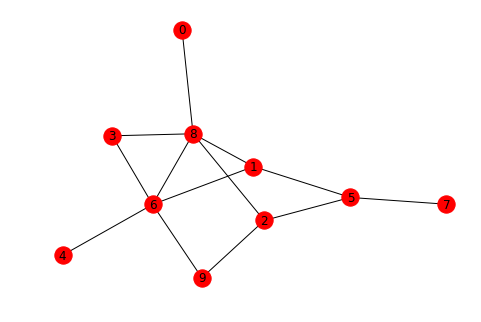

In [20]:
G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),[mynode.nodeid for mynode in mynodes])))    

nx.draw(G, with_labels=True, pos=nx.spring_layout(G))

In [6]:
pos = nx.spring_layout(G)
#pos = nx.circular_layout(G)

NameError: name 'nx' is not defined

In [53]:
pos

{0: array([1.00000000e+00, 2.66236709e-08]),
 1: array([0.809017  , 0.58778527]),
 2: array([0.30901698, 0.95105656]),
 3: array([-0.30901702,  0.9510565 ]),
 4: array([-0.80901705,  0.58778521]),
 5: array([-9.99999982e-01, -6.07991049e-08]),
 6: array([-0.80901693, -0.58778533]),
 7: array([-0.30901708, -0.95105645]),
 8: array([ 0.30901713, -0.95105645]),
 9: array([ 0.80901694, -0.58778527])}